[*********************100%***********************]  1 of 1 completed

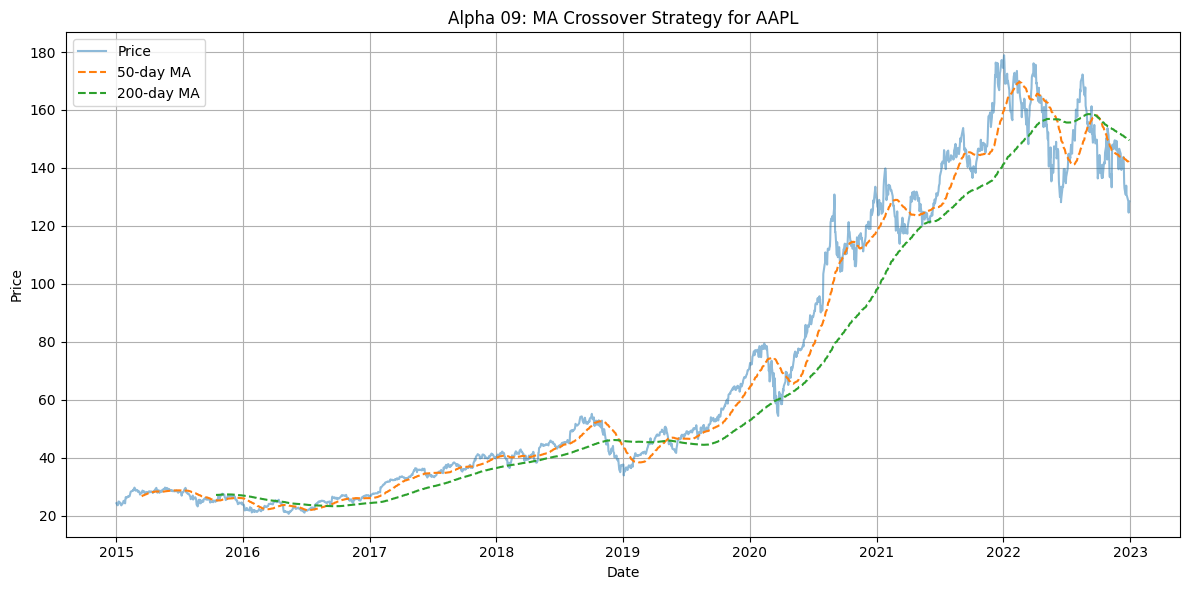

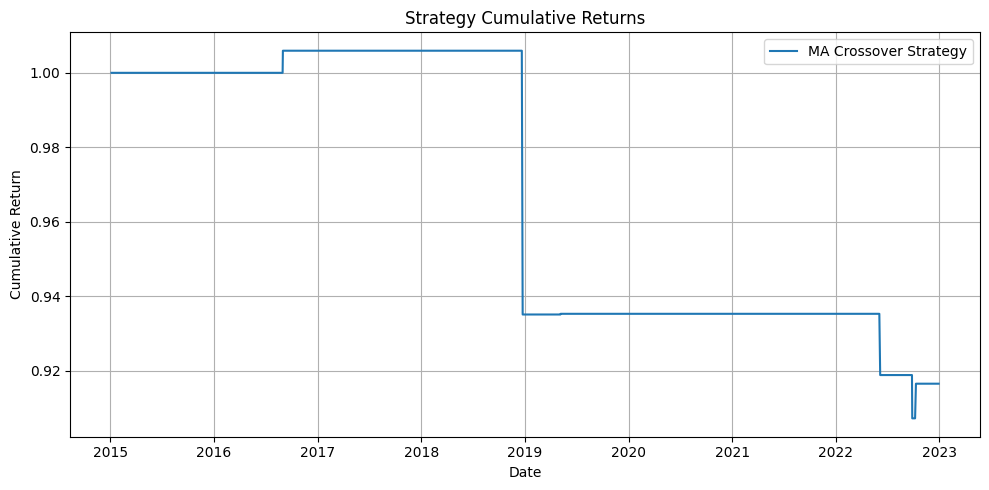

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# === Download historical data ===
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")

# === Extract 'Close' price ===
price = data[('Close', 'AAPL')] if isinstance(data.columns, pd.MultiIndex) else data['Close']

# === Moving Averages ===
short_window = 50
long_window = 200

short_ma = price.rolling(window=short_window).mean()
long_ma = price.rolling(window=long_window).mean()

# === Generate Signals ===
signals = pd.Series(0, index=price.index)
signals[(short_ma > long_ma) & (short_ma.shift(1) <= long_ma.shift(1))] = 1    # Buy
signals[(short_ma < long_ma) & (short_ma.shift(1) >= long_ma.shift(1))] = -1   # Sell

# === Backtest ===
daily_returns = price.pct_change().shift(-1)
strategy_returns = signals.shift(1) * daily_returns
cumulative_returns = (1 + strategy_returns).cumprod()

# === Plot Price with MAs ===
plt.figure(figsize=(12, 6))
plt.plot(price, label='Price', alpha=0.5)
plt.plot(short_ma, label=f'{short_window}-day MA', linestyle='--')
plt.plot(long_ma, label=f'{long_window}-day MA', linestyle='--')
plt.title(f'Alpha 09: MA Crossover Strategy for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot Cumulative Returns ===
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='MA Crossover Strategy')
plt.title("Strategy Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
